Apply Data Cleaning to the Datasets and then apply Kmeans algorithm for find pattern and the best value of.the K for the following features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data01.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [9]:
df.drop(columns='CustomerID',inplace=True)

In [11]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


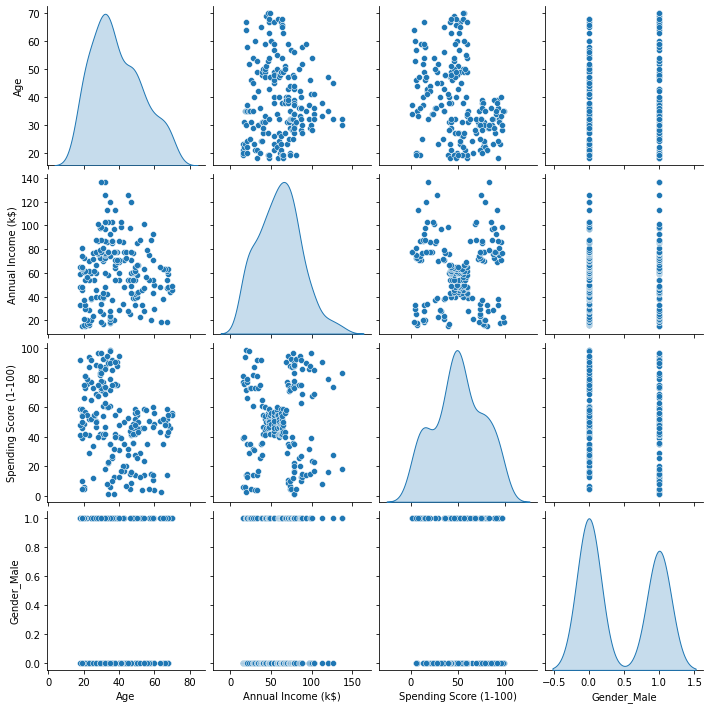

In [13]:
sns.pairplot(df,diag_kind='kde')

In [22]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

x = pd.DataFrame(pt.fit_transform(df),columns= df.columns)

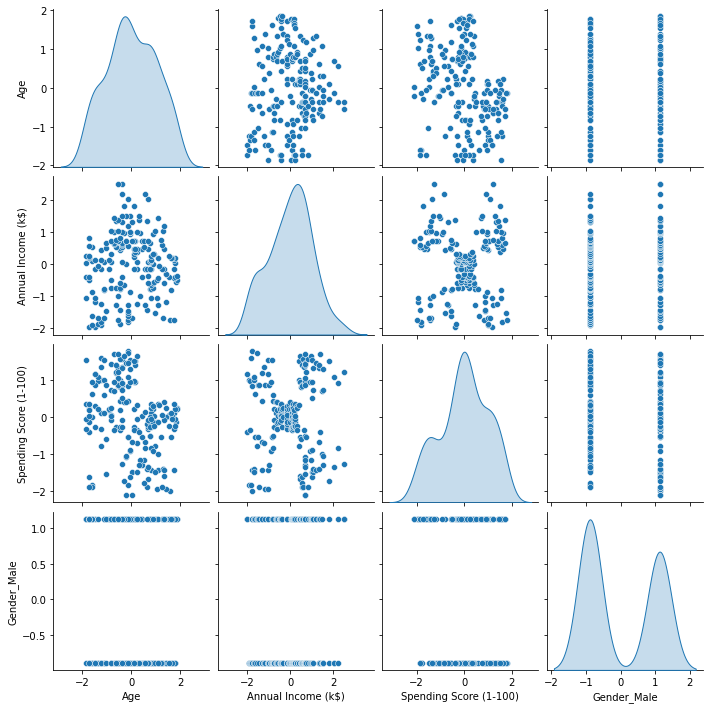

In [23]:
sns.pairplot(x,diag_kind='kde')

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range = np.arange(1,16)
cluster_error = []

for i in cluster_range:
    k = KMeans(i,random_state=2)
    k.fit(x)
    cluster_error.append(k.inertia_)
    
k_means = [KMeans(i).fit(x) for i in cluster_range]
s_score = [silhouette_score(x,b.labels_) for b in k_means[1:]]

In [34]:
pd.DataFrame({'Number of clusters':cluster_range,'Cluster Error':cluster_error})

,Number of clusters,Cluster Error
0,1,800.000000
1,2,590.972497
2,3,479.323008
3,4,386.864071
4,5,329.518080
5,6,280.960605
6,7,241.028750
7,8,205.710897
8,9,180.223187
9,10,154.766419


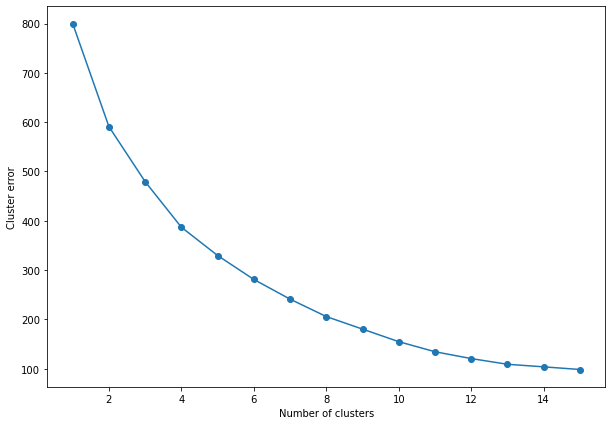

In [32]:
plt.figure(figsize=(10,7))
plt.plot(cluster_range,cluster_error,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster error')
plt.show()

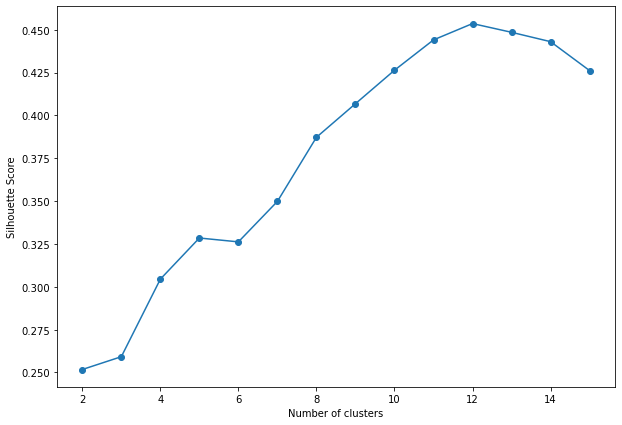

In [33]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(2,16),s_score,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The highest average silhouette score is observed for 12 clusters, the elbow plots does not show this.

In [35]:
k_fin = KMeans(n_clusters=12,random_state=2)
k_fin.fit(x)
labels = k_fin.labels_

In [37]:
x['Groups'] = labels

In [38]:
x

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Groups
0,-1.718993,-1.989930,-0.385308,1.128152,10
1,-1.470002,-1.989930,1.164467,1.128152,10
2,-1.591912,-1.930366,-1.820424,-0.886405,7
3,-1.240020,-1.930366,1.023549,-0.886405,9
4,-0.461118,-1.872032,-0.346103,-0.886405,7
...,...,...,...,...,...
195,-0.133840,2.027774,1.094146,-0.886405,5
196,0.563320,2.202670,-0.827902,-0.886405,3
197,-0.376090,2.202670,0.917116,1.128152,8
198,-0.376090,2.515898,-1.254103,1.128152,4
